In [1]:
import numpy as np 
import pandas as pd
import os
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 15.1 MB/s 


Installing the pretrained MTCNN model

In [3]:
import pandas
import mtcnn
from IPython.display import Image
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from tqdm import tqdm
import sklearn.metrics as metrics

In [4]:
import zipfile
local_zip ="/content/drive/MyDrive/People.zip"

In [5]:
zip_ref = zipfile.ZipFile(local_zip, 'r')
print(type(zip_ref))
zip_ref.extractall('/tmp/FaceCount/')
zip_ref.close()

<class 'zipfile.ZipFile'>


In [8]:
base_directory = r"/tmp/FaceCount"
train_directory = r"/train"
image_directory = base_directory + train_directory + r"/image_data"

test_dataframe = pandas.read_csv(base_directory + r"/test.csv")
train_dataframe = pandas.read_csv("/tmp/FaceCount/train/train.csv")
target = train_dataframe.columns[-1]

train_dataframe.head(10)

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4
5,10007.jpg,4
6,10008.jpg,6
7,10010.jpg,7
8,10011.jpg,6
9,10012.jpg,8


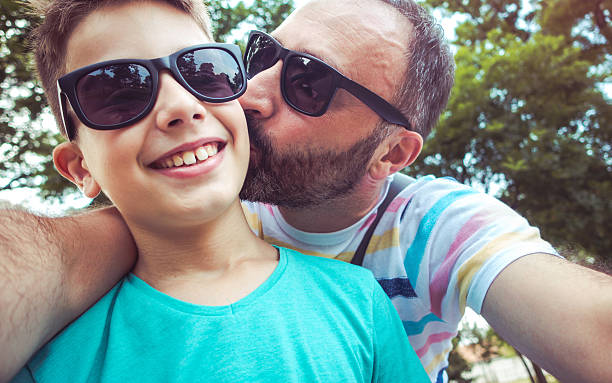

'HeadCount: 2'

In [9]:
def display_image(filename, head_count='Test set'):
    display(Image(image_directory + "/" + filename, width = 500, height = 300), "HeadCount: "+ head_count.astype(str))
    
display_image(train_dataframe.iloc[2, 0], train_dataframe.iloc[2, 1])

**Function for Bounded Box**

In [10]:
def draw_image_with_boxes(filename, result_list):
    fig, ax = pyplot.subplots(figsize=(15, 8))
    # load the image
    data = pyplot.imread(image_directory + "/" + filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    pyplot.show()

In [11]:
errors = []

detector = MTCNN()
def detect_faces(filename):
    try:
        current_image = pyplot.imread(image_directory + "/" + filename)
        boxes = detector.detect_faces(current_image)
        length = len(boxes)
    except ValueError:
        errors.append(filename)
        return filename, [], 0
    
    return filename, boxes, length

**Model prediction of number of faces in sample image**

1/1 [==============================] - 0s 100ms/step


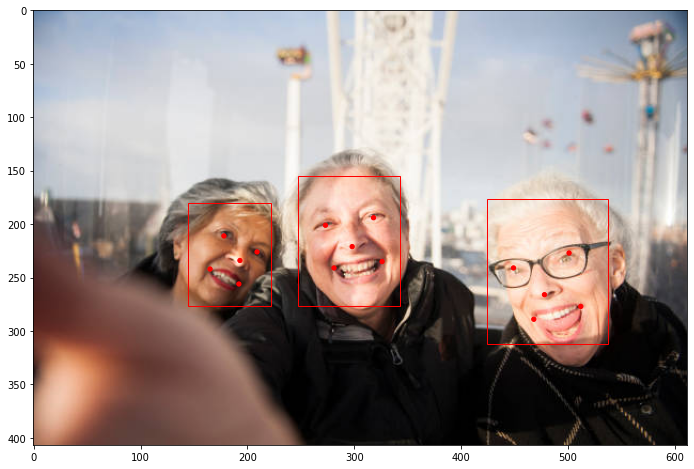

expected prediction: 3, actually detected: 3


In [15]:
def single_image_analysis(filename, expected_pred):
    _, detected_boxes, _ = detect_faces(train_dataframe.iloc[3, 0])
    draw_image_with_boxes(train_dataframe.iloc[3, 0], detected_boxes)

    print(f"expected prediction: {train_dataframe.iloc[3, 1]}, actually detected: {len(detected_boxes)}")
    

single_image_analysis(train_dataframe.iloc[3, 0], train_dataframe.iloc[3, 1])


In [16]:
image_files = train_dataframe.iloc[0:50, 0]
targets = train_dataframe.iloc[0:50, 1]
predicted = []

for image in tqdm(image_files):
    predicted.append(detect_faces(image))

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 1/50 [00:00<00:46,  1.06it/s]

2/2 [==============================] - 0s 16ms/step


  4%|▍         | 2/50 [00:02<00:49,  1.02s/it]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 3/50 [00:02<00:46,  1.01it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 4/50 [00:03<00:44,  1.04it/s]

1/1 [==============================] - 0s 61ms/step


 10%|█         | 5/50 [00:04<00:42,  1.05it/s]

1/1 [==============================] - 0s 51ms/step


 12%|█▏        | 6/50 [00:05<00:42,  1.04it/s]

2/2 [==============================] - 0s 20ms/step


 14%|█▍        | 7/50 [00:07<00:45,  1.07s/it]

1/1 [==============================] - 0s 56ms/step


 16%|█▌        | 8/50 [00:08<00:43,  1.04s/it]

2/2 [==============================] - 0s 19ms/step


 18%|█▊        | 9/50 [00:09<00:44,  1.08s/it]

2/2 [==============================] - 0s 13ms/step


 20%|██        | 10/50 [00:10<00:42,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 11/50 [00:11<00:41,  1.06s/it]

2/2 [==============================] - 0s 29ms/step


 24%|██▍       | 12/50 [00:12<00:41,  1.09s/it]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 13/50 [00:13<00:37,  1.02s/it]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 14/50 [00:14<00:37,  1.03s/it]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 15/50 [00:15<00:36,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 16/50 [00:16<00:33,  1.00it/s]

2/2 [==============================] - 0s 23ms/step


 34%|███▍      | 17/50 [00:17<00:33,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 18/50 [00:18<00:32,  1.02s/it]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 19/50 [00:19<00:31,  1.01s/it]

2/2 [==============================] - 0s 23ms/step


 40%|████      | 20/50 [00:20<00:30,  1.00s/it]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 21/50 [00:21<00:28,  1.00it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 22/50 [00:22<00:27,  1.00it/s]

2/2 [==============================] - 0s 26ms/step


 46%|████▌     | 23/50 [00:23<00:29,  1.09s/it]

2/2 [==============================] - 0s 24ms/step


 48%|████▊     | 24/50 [00:24<00:29,  1.14s/it]

2/2 [==============================] - 0s 21ms/step


 50%|█████     | 25/50 [00:26<00:28,  1.14s/it]

2/2 [==============================] - 0s 42ms/step


 52%|█████▏    | 26/50 [00:27<00:28,  1.19s/it]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 27/50 [00:28<00:25,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 28/50 [00:29<00:23,  1.08s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 29/50 [00:30<00:21,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 30/50 [00:31<00:20,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 31/50 [00:32<00:19,  1.01s/it]

2/2 [==============================] - 0s 13ms/step


 64%|██████▍   | 32/50 [00:33<00:17,  1.00it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 33/50 [00:34<00:16,  1.04it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 34/50 [00:35<00:15,  1.02it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████   | 35/50 [00:36<00:14,  1.01it/s]

3/3 [==============================] - 0s 44ms/step


 72%|███████▏  | 36/50 [00:37<00:15,  1.11s/it]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 37/50 [00:38<00:13,  1.04s/it]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 38/50 [00:39<00:12,  1.04s/it]

2/2 [==============================] - 0s 16ms/step


 78%|███████▊  | 39/50 [00:40<00:12,  1.11s/it]

2/2 [==============================] - 0s 34ms/step


 80%|████████  | 40/50 [00:42<00:11,  1.16s/it]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 41/50 [00:42<00:09,  1.09s/it]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 42/50 [00:43<00:08,  1.03s/it]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 43/50 [00:44<00:06,  1.02it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 44/50 [00:45<00:05,  1.10it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 45/50 [00:46<00:04,  1.08it/s]

2/2 [==============================] - 0s 27ms/step


 94%|█████████▍| 47/50 [00:47<00:02,  1.34it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 48/50 [00:48<00:01,  1.23it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 49/50 [00:49<00:00,  1.19it/s]

1/1 [==============================] - 0s 53ms/step


100%|██████████| 50/50 [00:50<00:00,  1.01s/it]


**Prediction metrics**

In [17]:
predicted_faces = [pred[2] for pred in predicted]
print(f"r2 score: {metrics.r2_score(targets, predicted_faces)}")

incorrect_predictions = []
for itr in range(targets.shape[0]):
    if targets[itr] != predicted_faces[itr]:
        current_list = [] 
        current_list.append(train_dataframe.iloc[itr, :].values)
        current_list.append(predicted_faces[itr])
        
        incorrect_predictions.append(current_list)

r2 score: 0.6401054339010543
